In [ ]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For advanced plots


In [ ]:
# Load the dataset
file_path = "/content/HousePrediction.xlsx"  # Ensure correct file path
df = pd.read_excel("/content/HousePrediction.xlsx")

# Display all column names
print("Column Names in the Dataset:\n", df.columns)


Column Names in the Dataset:
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')


In [ ]:
# Show first 100 rows
df.head(100)


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,60,RL,9765,Corner,1Fam,8,1993,1993,VinylSd,0.0,680.0,185000.0
96,96,20,RL,10264,Inside,1Fam,5,1999,1999,VinylSd,0.0,1588.0,214000.0
97,97,20,RL,10921,Inside,1Fam,5,1965,1965,HdBoard,0.0,960.0,94750.0
98,98,30,RL,10625,Corner,1Fam,5,1920,1950,Wd Sdng,0.0,458.0,83000.0


In [ ]:
# Display basic information about dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [ ]:
# TASK 2 Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


In [ ]:
# Display columns that have missing values
nan_features = df.columns[df.isnull().sum() > 0]
print("Columns with Missing Values:\n", nan_features)


Columns with Missing Values:
 Index(['MSZoning', 'Exterior1st', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'], dtype='object')


In [18]:
# Check Sales Price mean based on missing/non-missing data
mean_sale_price = df.groupby(df['SalePrice'].isnull())['SalePrice'].mean()
print("Mean Sale Price where data is Present vs Missing:\n", mean_sale_price)


Mean Sale Price where data is Present vs Missing:
 SalePrice
False    180921.19589
True              NaN
Name: SalePrice, dtype: float64


In [21]:
# Select numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
print(f"Total Numerical Features: {len(numerical_features)}")
print("Numerical Columns:\n", numerical_features)


Total Numerical Features: 9
Numerical Columns:
 Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'],
      dtype='object')


In [23]:
# Display only numerical columns (first 5 rows)
df[numerical_features].head()


,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,4,60,14260,5,2000,2000,0.0,1145.0,250000.0


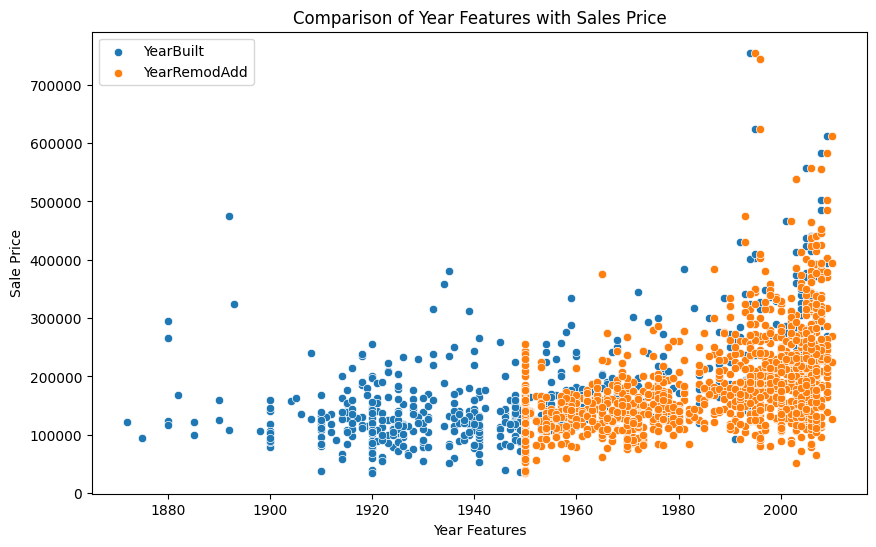

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if dataset has 'YearBuilt' or similar features
year_features = [col for col in df.columns if 'Year' in col]

# Plot Sales Price vs. each Year Feature
plt.figure(figsize=(10, 6))
for year_feature in year_features:
    sns.scatterplot(x=df[year_feature], y=df['SalePrice'], label=year_feature)
plt.xlabel("Year Features")
plt.ylabel("Sale Price")
plt.title("Comparison of Year Features with Sales Price")
plt.legend()
plt.show()


<Figure size 1200x600 with 0 Axes>

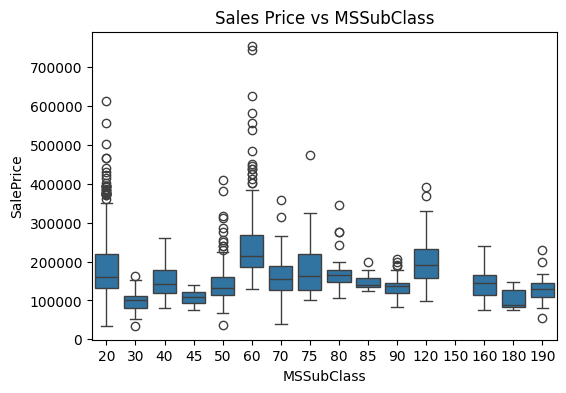

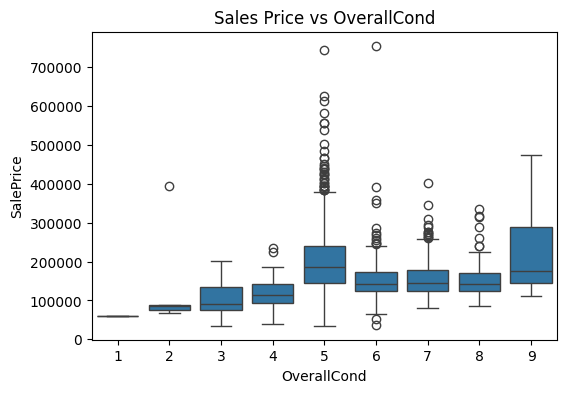

In [28]:
# Identify discrete variables (categorical or low-unique numerical)
discrete_features = [col for col in numerical_features if df[col].nunique() < 20 and col != 'SalesPrice']

# Plot boxplots for discrete features
plt.figure(figsize=(12, 6))
for feature in discrete_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[feature], y=df['SalePrice'])
    plt.title(f"Sales Price vs {feature}")
    plt.show()


<Figure size 1200x600 with 0 Axes>

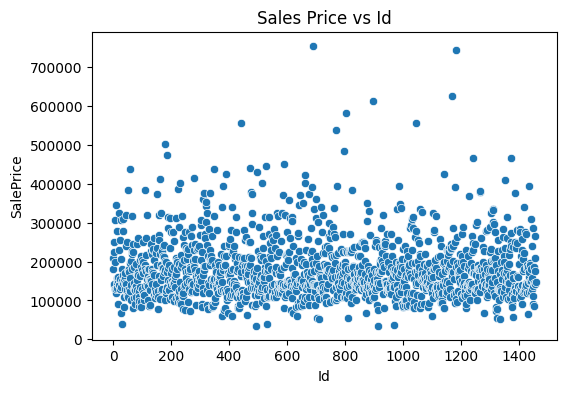

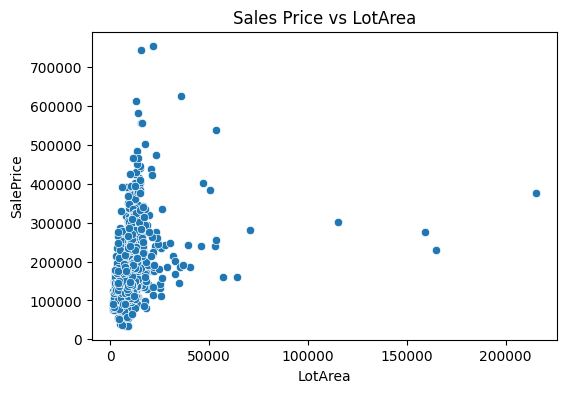

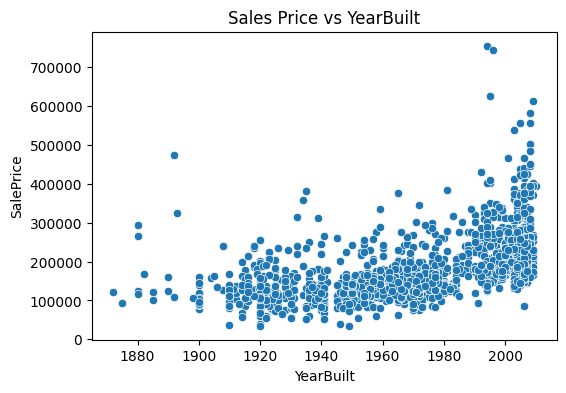

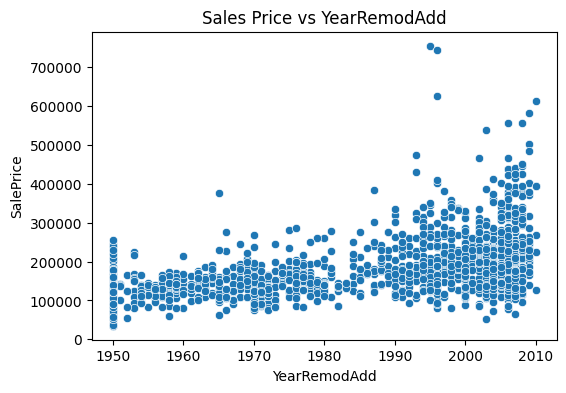

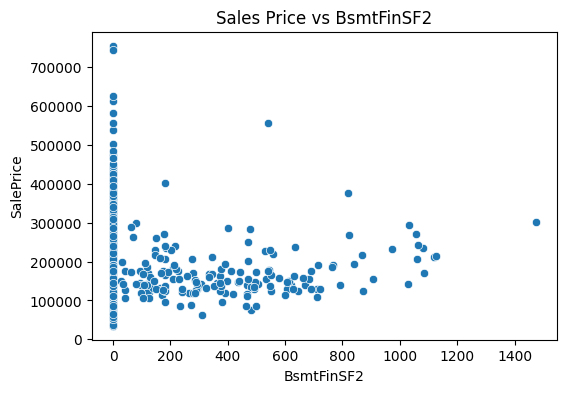

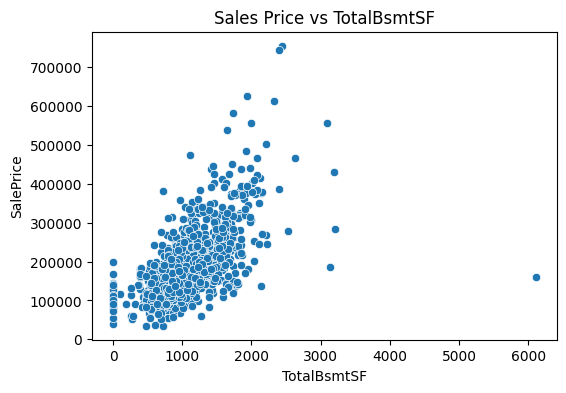

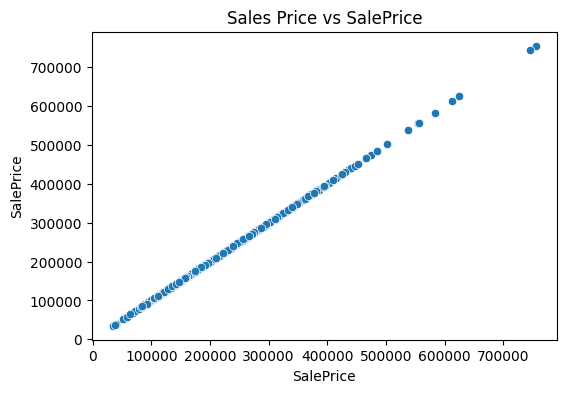

In [31]:
# Identify continuous numerical variables
continuous_features = [col for col in numerical_features if df[col].nunique() > 20]

# Plot scatterplots for continuous variables vs SalesPrice
plt.figure(figsize=(12, 6))
for feature in continuous_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['SalePrice'])
    plt.title(f"Sales Price vs {feature}")
    plt.show()


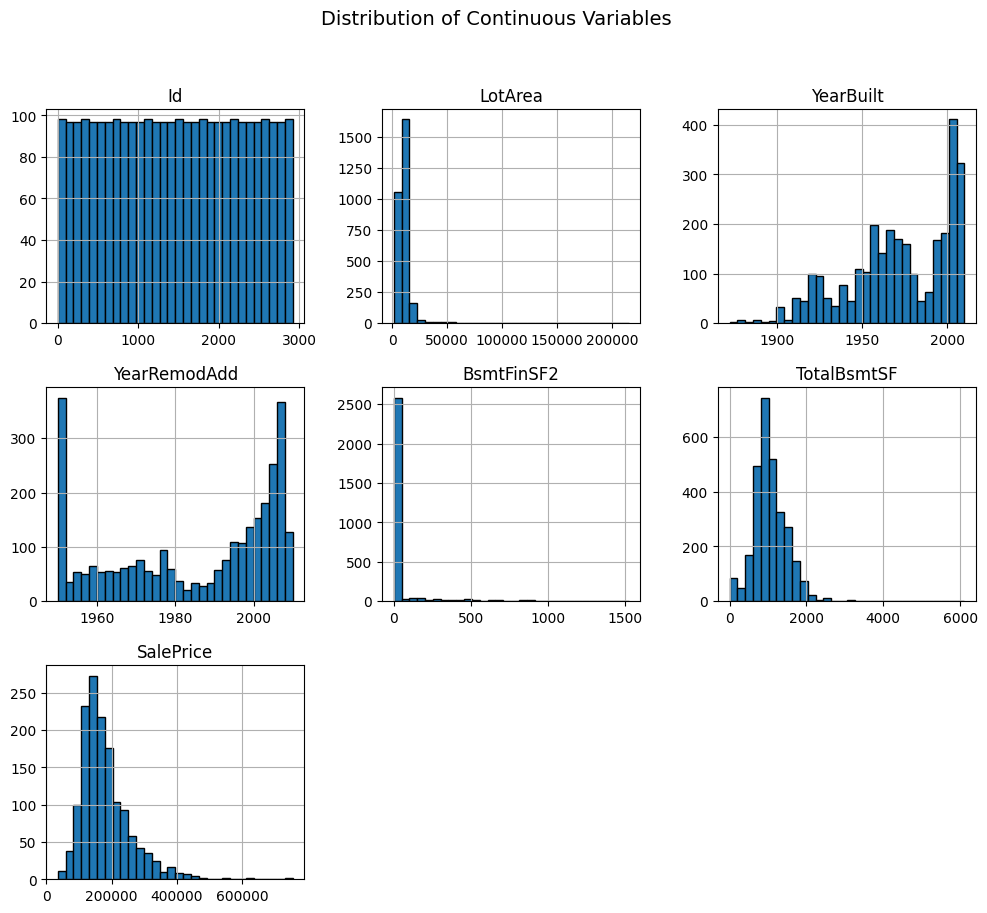

In [32]:
# Plot histograms for continuous variables
df[continuous_features].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Continuous Variables", fontsize=14)
plt.show()


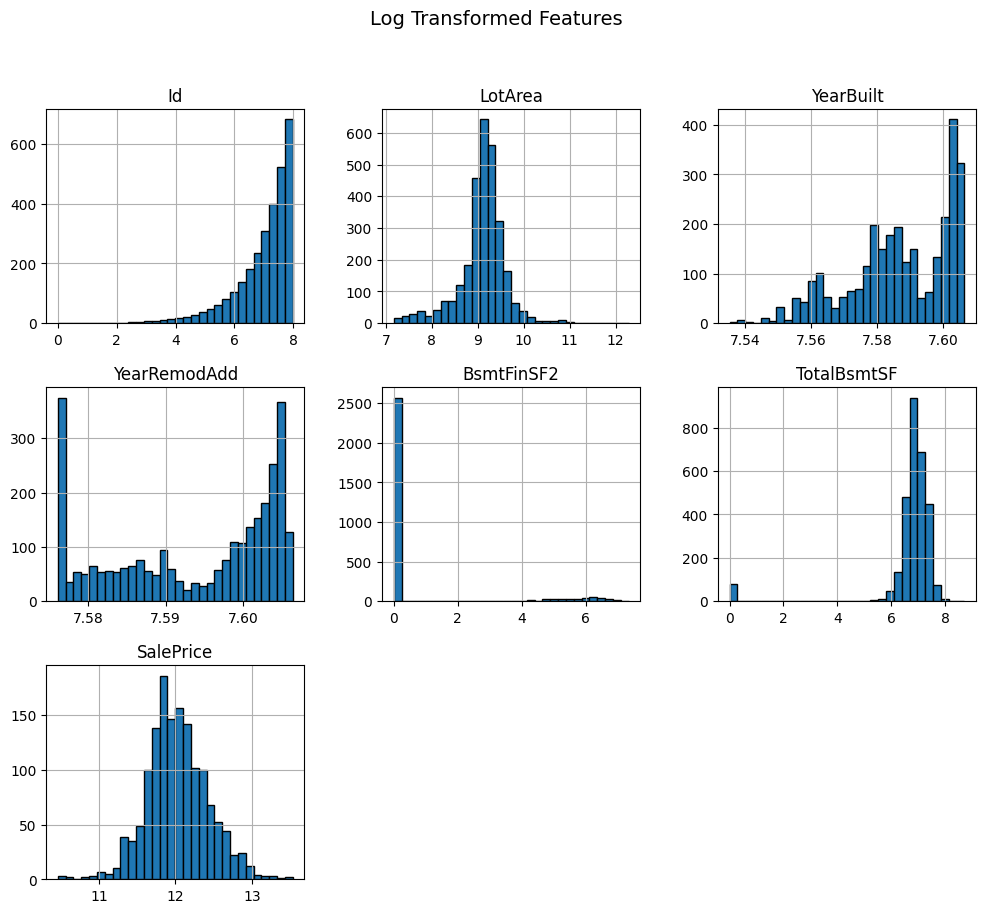

In [33]:
# Apply log transformation to skewed numerical features
df_log = df.copy()
for feature in continuous_features:
    df_log[feature] = np.log1p(df[feature])  # log(x+1) to avoid log(0) issues

# Visualize transformed data
df_log[continuous_features].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Log Transformed Features", fontsize=14)
plt.show()


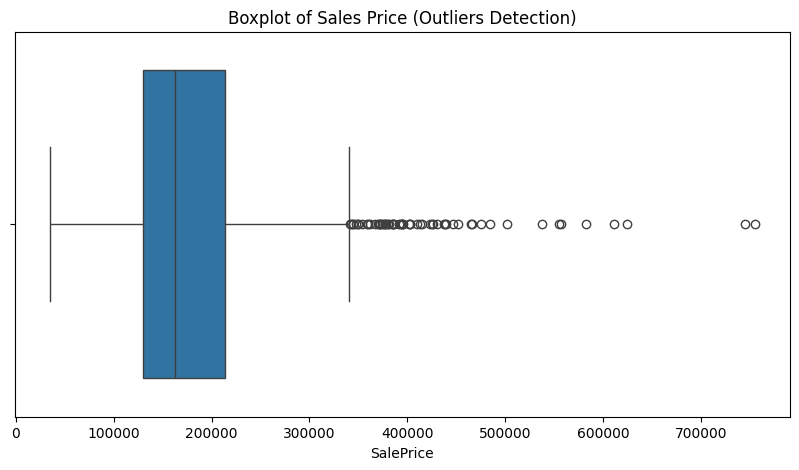

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Detecting outliers using Boxplot for 'SalesPrice'
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['SalePrice'])
plt.title("Boxplot of Sales Price (Outliers Detection)")
plt.show()

# Detecting Outliers using IQR Method
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
print


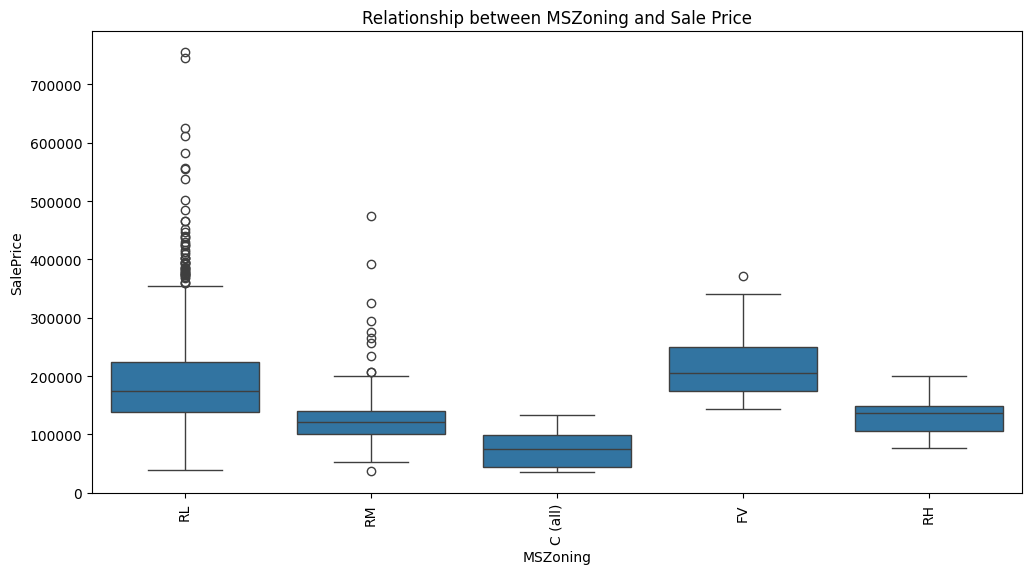

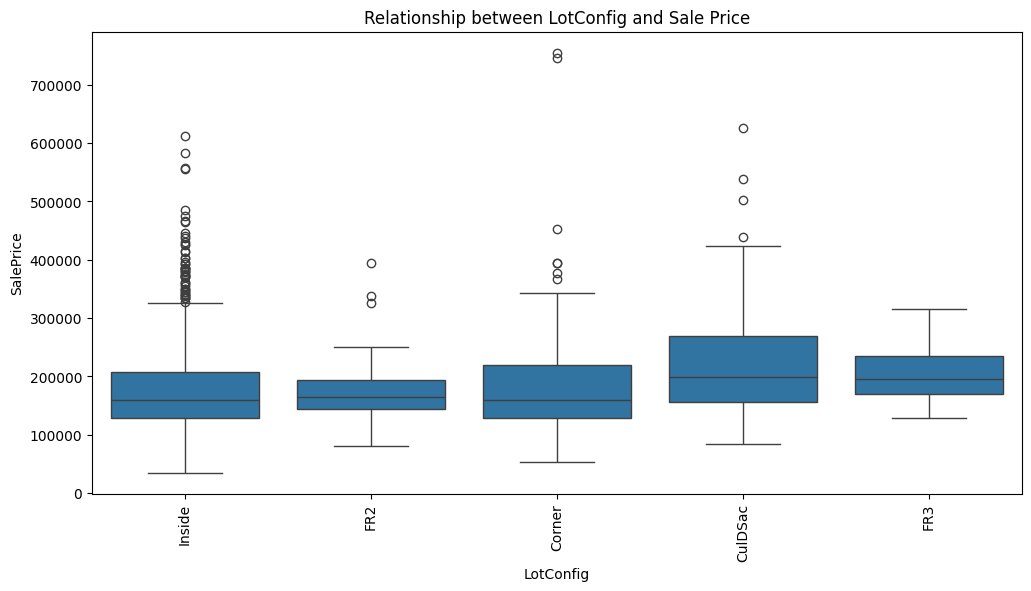

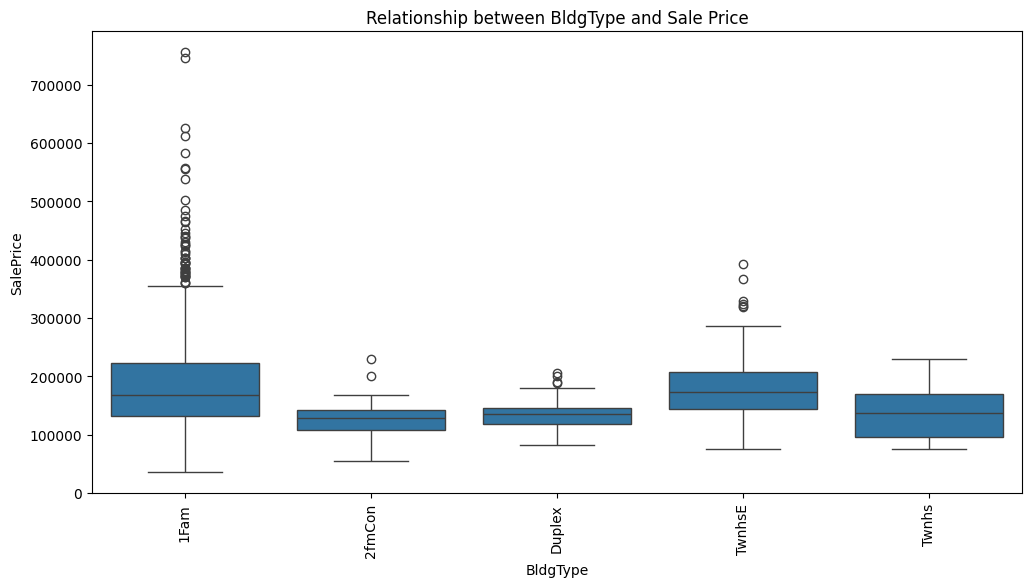

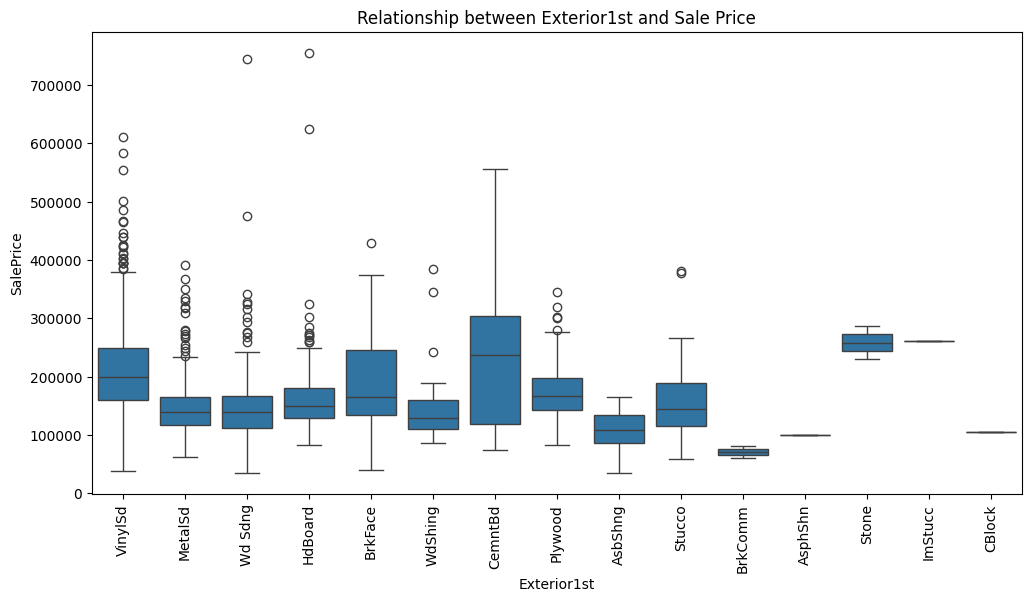

In [39]:
# Select categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Check relationship of each categorical feature with Sales Price
for col in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[col], y=df['SalePrice'])
    plt.xticks(rotation=90)  # Rotate labels for better visibility
    plt.title(f"Relationship between {col} and Sale Price")
    plt.show()


SalePrice       1.000000
TotalBsmtSF     0.613581
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
BsmtFinSF2     -0.011378
Id             -0.021917
OverallCond    -0.077856
MSSubClass     -0.084284
Name: SalePrice, dtype: float64


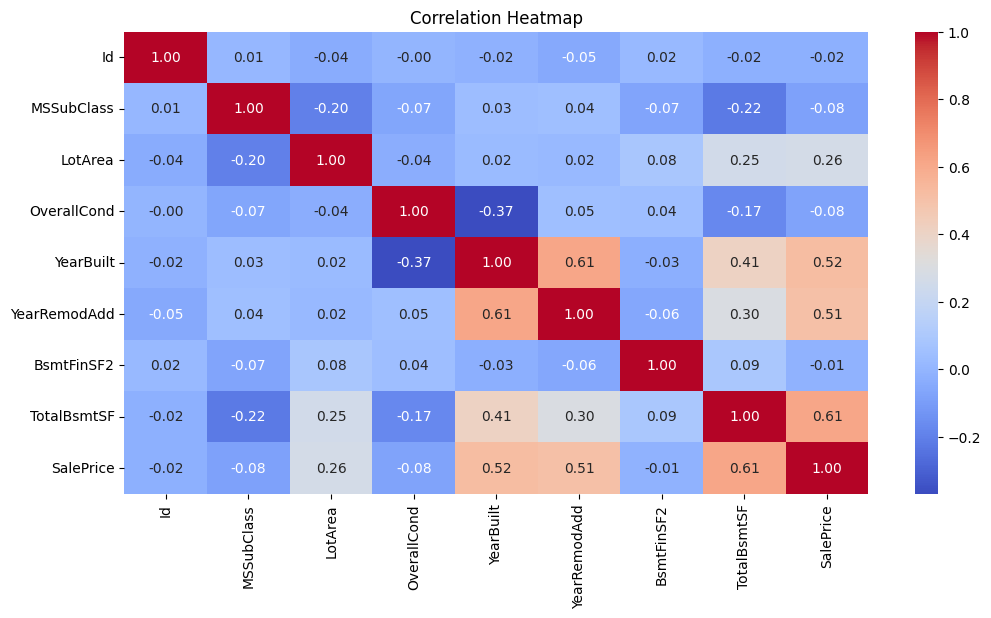

In [41]:
# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation
correlation_matrix = df[numerical_features].corr()

# Display correlation with SalesPrice
sales_price_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(sales_price_corr)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


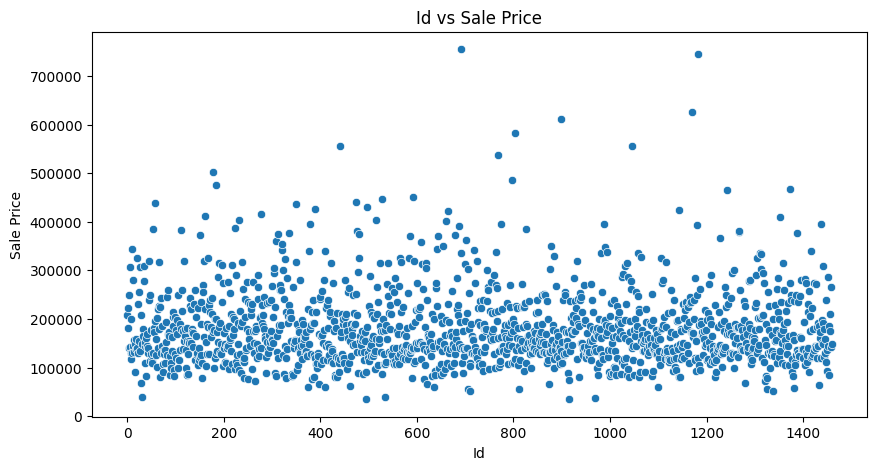

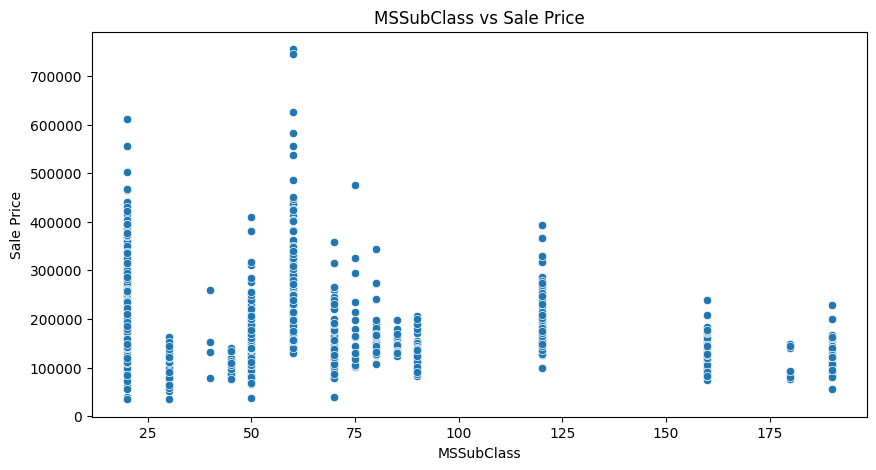

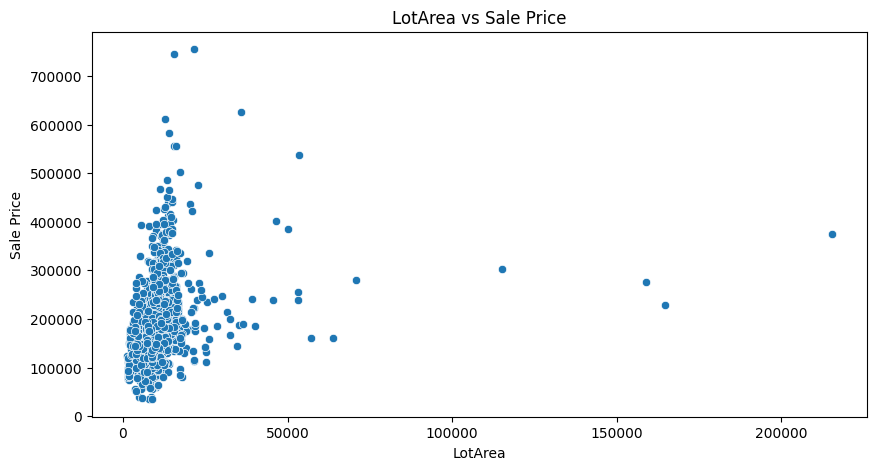

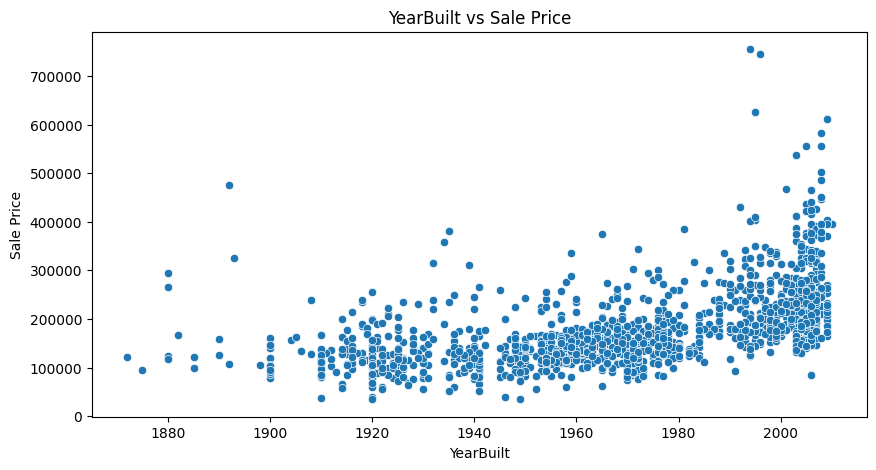

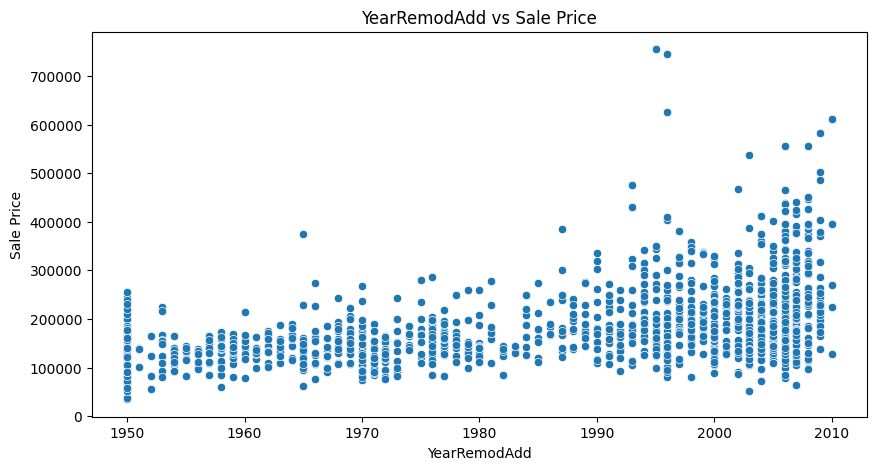

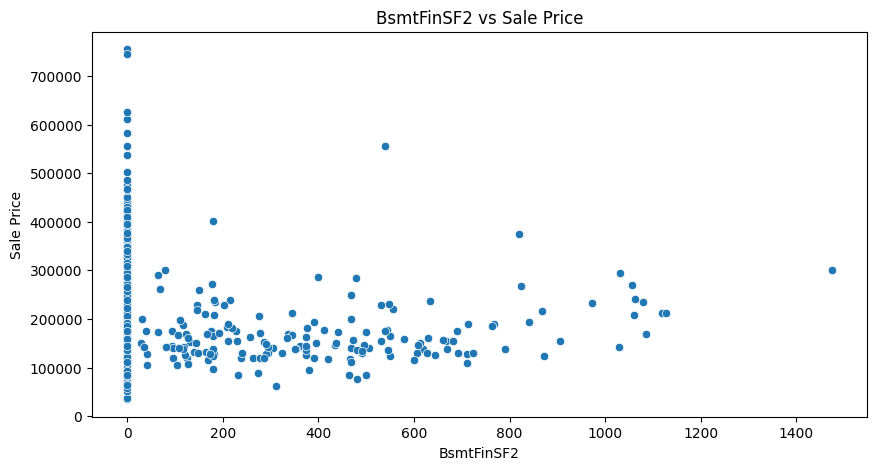

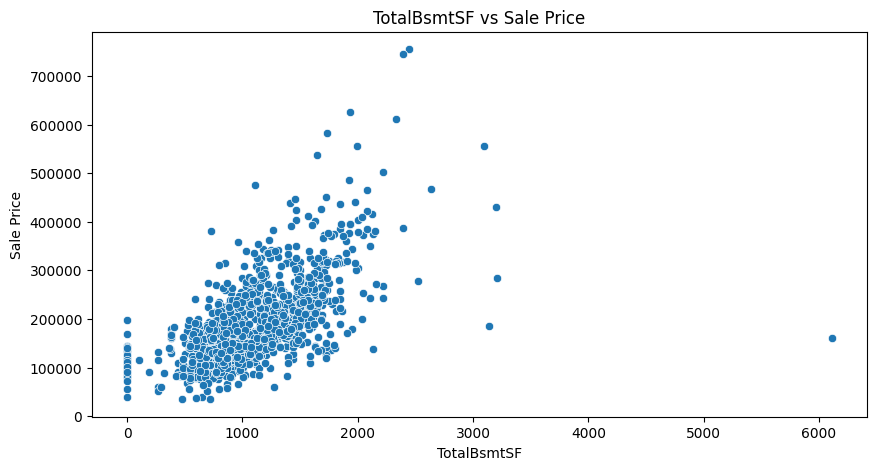

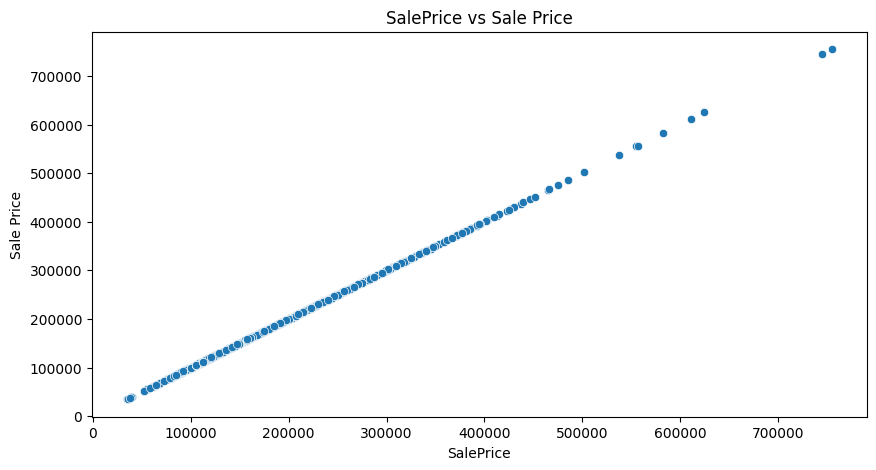

In [43]:
# Select continuous features
continuous_features = [col for col in numerical_features if df[col].nunique() > 10]  # More than 10 unique values

# Plot each continuous feature against SalesPrice
for col in continuous_features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f"{col} vs Sale Price")
    plt.xlabel(col)
    plt.ylabel("Sale Price")
    plt.show()


In [45]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

# Fill numerical missing values with median
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


Missing values per column:
 Series([], dtype: int64)


<ipython-input-45-6c2324fe7d1a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-45-6c2324fe7d1a>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [47]:
df = pd.get_dummies(df, drop_first=True)  # Convert categorical to numerical


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [51]:
if 'YearBuilt' in df.columns:
    df['HouseAge'] = 2024 - df['YearBuilt']
    df.drop(columns=['YearBuilt'], inplace=True)  # Remove original column
